# Import scripts

repo & folder name: GreenhouseData
Requirements imported!
Inventories imported!
current figure and save dpi = 160; current single fig size = (8, 4)


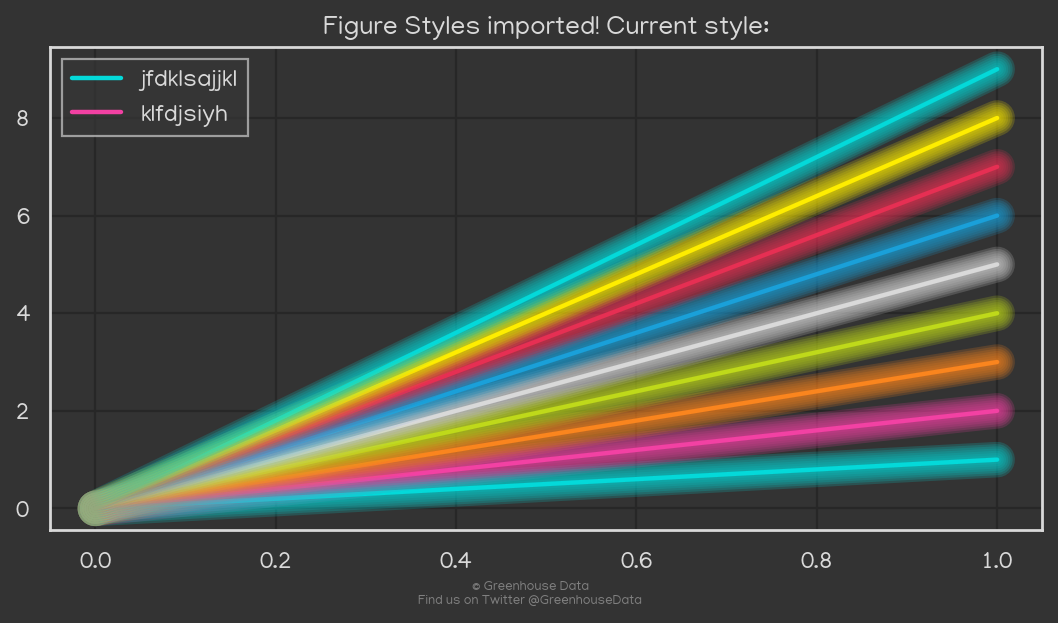

styles imported!
Imported COUNTRY_DICT & CODE_GENERATOR_ISO3
fig_country_saver imported!


In [1]:
%run ../scripts/Requirements.ipynb
%run ../scripts/Inventory_Importer.ipynb
%run ../scripts/Figure_Styles.ipynb
%run ../scripts/Country_ISO_Codes.ipynb
%run ../scripts/Figure_Saver.ipynb

In [2]:
# show_figure_style()

In [3]:
# dict for figure generator
STANDARD_COUNTRY_DICT = json.load(open("../supplemental/STANDARD_COUNTRY_DICT_ISO3.json", "r"))
COUNTRY_DICT = json.load(open("../supplemental/STANDARD_COUNTRY_DICT_ISO3.json", "r"))

# MIXED INVENTORIES

CO2 Totals by Country

In [ ]:
# TOTALS OF CO2 BY COUNTRY
#------------------------------------------------------------------------------------

def plot_CO2_totals(code, close=False):
    fig, axs = plt.subplots(1,1, figsize = (8,4))
    fig.suptitle(f"Total CO2 emissions (excluding LULUCF): {STANDARD_COUNTRY_DICT[code]}")
    
    #BP
    try:
        df_bp_tot = df_bp[df_bp.code == code].reset_index().loc[0,"1965":].astype(float)
        df_bp_tot.index = pd.to_datetime(df_bp_tot.index, format="%Y")
        # display(df_bp_tot)
        axs.plot(df_bp_tot, label=r"$\bf{" + "BP" + "}$")
    except:
        axs.plot([0],[0], label="BP (N/A)")

    #CDIAC
    try:
        df_cdiac_tot = df_cdiac.loc[df_cdiac.code==code, :].set_index("Year")["Total CO2 emissions from fossil-fuels and cement production (MtCO2)"]
        df_cdiac_tot.index = pd.to_datetime(df_cdiac_tot.index, format="%Y")
        if len(df_cdiac_tot)>1:
            axs.plot(df_cdiac_tot, label=r"$\bf{" + "CDIAC" + "}$", ls="--", lw=3)
        else: fail_this_shit
    except:
        axs.plot([0],[0], label="CDIAC (N/A)")
    
    #EIA
    try:
        df_eia_tot = df_eia[(df_eia.code==code) & (df_eia.fuel=='Total CO2 emissions')].set_index("fuel").loc[:, "1949":].iloc[0,:]
        df_eia_tot.index = pd.to_datetime(df_eia_tot.index, format="%Y")
        axs.plot(df_eia_tot, label=r"$\bf{" + "EIA" + "}$")    
    except:
        axs.plot([0],[0], label="EIA (N/A)")
    
    #IEA
    try:
        df_iea_tot = df_iea[(df_iea.code==code)].set_index("type").loc["total_fuel_combustion", "1971":]
        df_iea_tot.index = pd.to_datetime(df_iea_tot.index, format="%Y")
        axs.plot(df_iea_tot, label=r"$\bf{" + "IEA" + "}$")   
    except:
        axs.plot([0],[0], label="IEA (N/A)")
    
    #GCP
    try:
        df_gcp_tot = df_gcp[(df_gcp.code==code)].loc[:, "1959":].iloc[0,:]
        df_gcp_tot.index = pd.to_datetime(df_gcp_tot.index, format="%Y")
        axs.plot(df_gcp_tot, label=r"$\bf{" + "GCP (production)" + "}$", color="m")       
    except:
        axs.plot([0],[0], label="GCP prod (N/A)")
    
    #GCP-cons
    try:
        df_gcp_cons_tot = df_gcp_cons[(df_gcp_cons.code==code)].loc[:, "1959":].iloc[0,:]
        df_gcp_cons_tot.index = pd.to_datetime(df_gcp_cons_tot.index, format="%Y")
        axs.plot(df_gcp_cons_tot, label=r"$\bf{" + "GCP (consumption)" + "}$", color="white")       
    except:
        axs.plot([0],[0], label="GCP cons (N/A)")
        
    axs.set_xlabel("year")
    axs.set_ylabel("MtCO2/year")
    axs.set_ylim(bottom=0)
    axs.legend(loc="upper left", title="Inventory:", fontsize=9)
    
    for i,j in enumerate(axs.lines):
        axs.lines[i].set_marker("o")
        axs.lines[i].set_markersize(2)
        axs.lines[i].set_linewidth(1.3)
        # axs.lines[i].set_linestyle(":")
        
    NEONIZE(axs,6,alpha_degree = 95)
    
    add_GreenhouseData_trademark(fig, y=-.04)
    
    fig_country_saver(fig, code, "CO2_totals")
    
    if close == True:
        plt.close()

#----------------------------------------------------------------------------------

#Random example
import random
plot_CO2_totals(random.choice(list(STANDARD_COUNTRY_DICT.keys())))

In [ ]:
# GENERATE AND SAVE FIGS FOR ALL COUNTRIES

list_codes = list(STANDARD_COUNTRY_DICT.keys()) #UPDATE HERE

for i in range(len(list_codes)):
    code = list_codes[i]
    print(code, end="\r")
    try:
        plot_CO2_totals(code, close=True) #UPDATE HERE
    except:
        display(f"{code} nop")
        plt.close()
        
%run UPDATE.ipynb

# BP

In [4]:
df_bp

,code,name,unit,1965,1966,1967,1968,1969,1970,1971,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,CAN,Canada,MtCO2,260.328494,271.695135,285.543065,308.282174,320.455802,344.911566,351.587904,...,554.684502,551.136751,564.581949,571.809431,570.155125,553.250422,565.912760,576.210989,577.997163,517.656723
1,MEX,Mexico,MtCO2,62.133329,65.055673,66.647498,72.170911,79.106716,84.172180,89.461650,...,472.973143,476.710063,483.185138,471.180127,475.225283,480.443636,486.075949,477.118539,459.758515,373.215914
2,USA,US,MtCO2,3451.891855,3639.795004,3738.161319,3947.343459,4117.396247,4271.528132,4309.068601,...,5348.439351,5101.537959,5268.307567,5277.560073,5165.570150,5060.806233,5003.178942,5166.031776,5029.389363,4457.219800
3,NaN,Total North America,MtCO2,3774.353678,3976.545812,4090.351882,4327.796544,4516.958764,4700.611877,4750.118155,...,6376.096995,6129.384774,6316.074655,6320.549632,6210.950558,6094.500291,6055.167650,6219.361305,6067.145041,5348.092438
4,ARG,Argentina,MtCO2,82.175120,84.526808,86.852525,89.324243,92.183564,85.895493,90.804629,...,174.763500,183.748817,189.430178,189.544434,192.767155,191.450785,189.685376,187.460685,175.817913,164.133062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,NaN,Total Asia Pacific,MtCO2,1431.313107,1549.491516,1615.940543,1721.616694,1958.204612,2234.981320,2445.576141,...,14869.453290,15309.823063,15666.971249,15850.095276,15988.325151,16148.466989,16501.051245,16917.645565,17203.330308,16812.478080
98,NaN,Total World,MtCO2,11189.710673,11694.894484,12055.547104,12701.480490,13483.695285,14291.709386,14762.395588,...,32172.508226,32503.997053,33071.152064,33140.667330,33206.145249,33361.880092,33726.868179,34351.098958,34356.611795,32318.644854
99,NaN,of which: OECD,MtCO2,7701.282862,8003.175822,8270.866419,8782.764892,9306.691008,9791.451164,9934.096882,...,12857.597343,12667.868636,12767.240569,12553.922901,12473.073827,12377.713337,12396.274549,12494.836120,12140.099652,10778.102600
100,NaN,Non-OECD,MtCO2,3488.427811,3691.718662,3784.680685,3918.715598,4177.004277,4500.258222,4828.298706,...,19314.910883,19836.128418,20303.911495,20586.744430,20733.071422,20984.166754,21330.593631,21856.262837,22216.512143,21540.542254


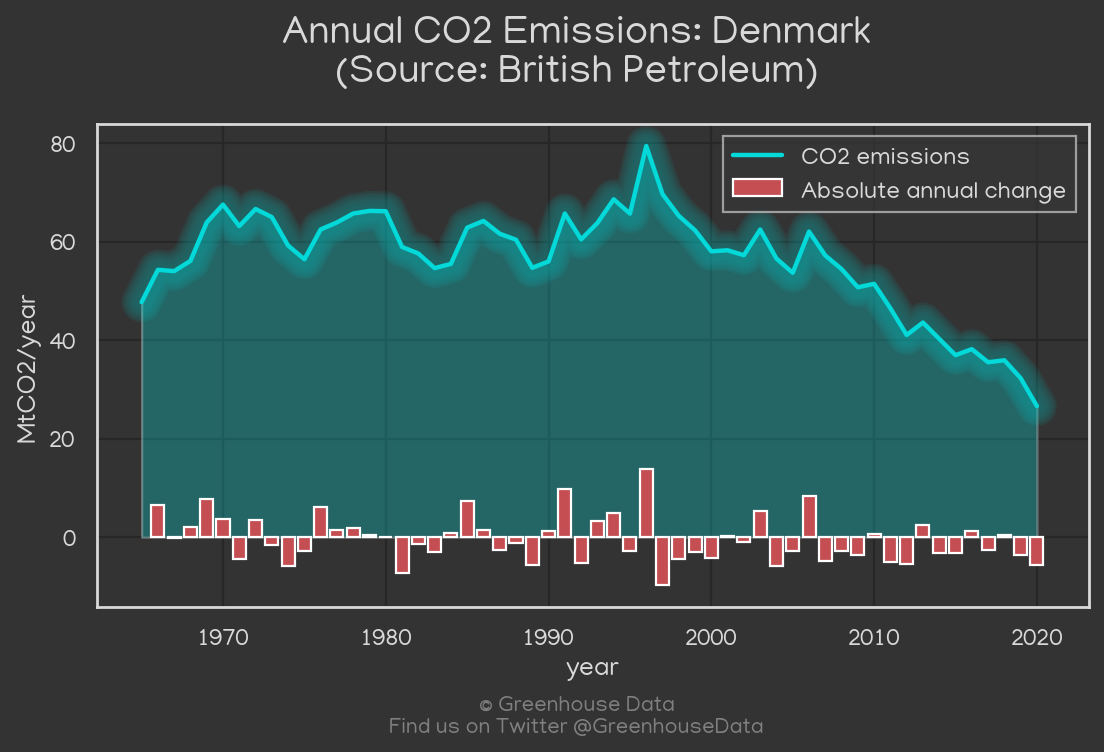

In [5]:
df_bp = df_bp[df_bp.code.notna()].reset_index().drop("index", axis=1)

#------------------------------------------------------------------------------------

def plot_bp_totals(code, close=False):
    fig, axs = plt.subplots(1,1, figsize = (8,4))
    fig.suptitle("Annual CO2 Emissions: {}\n(Source: British Petroleum)".format(STANDARD_COUNTRY_DICT[code]),
                 fontsize=18, y= 1.05)
    
    x = df_bp.loc[:,"1965":].columns.astype(float)
    y = df_bp[df_bp.code == code].reset_index().loc[0,"1965":].astype(float)
    axs.plot(x,y, label="CO2 emissions")
    axs.fill_between(x,y, alpha=.3)
    
    x2 = df_bp.loc[:,"1965":].diff(axis=1).columns.astype(float)
    y2 = df_bp[df_bp.code == code].reset_index().loc[0,"1965":].diff().astype(float)
    axs.bar(x2,y2, label="Absolute annual change", color="r")
    
    axs.set_ylabel("MtCO2/year")
    axs.set_xlabel("year")

    axs.legend()
    
    
    NEONIZE(axs, 9)
    
    add_GreenhouseData_trademark(fig, y=-.07, fontsize=10)

    fig_country_saver(fig, code, "BP_1")
    
    if close == True:
        plt.close()

#----------------------------------------------------------------------------------

#Random example
import random
plot_bp_totals(random.choice(df_bp.code))

In [6]:
# GENERATE AND SAVE FIGS FOR ALL COUNTRIES


list_codes = df_bp.code.unique() #UPDATE THIS

for i, j in enumerate(list_codes):
    code = j
    print(code, end="\r")
    try:
        plot_bp_totals(code, close=True) #UPDATE THIS
    except:
        display(f"{code} nop")
        plt.close()
print("Finished")

%run UPDATE.ipynb

Finished
pages updated
Global & country READMES updated
Homepage updated


# CDIAC

In [ ]:
df_cdiac

In [ ]:
df_cdiac = df_cdiac[df_cdiac.code.notna()].reset_index().drop("index", axis=1)

#----------------------------------------------------------------------------------

def plot_cdiac_totals(code, close=False):
    fig, axs = plt.subplots(2,1, figsize = (10,10))
    axs=axs.flatten()
    fig.suptitle("CO2 Emissions by fuel type: {} ({})\n(Source: CDIAC)".format(STANDARD_COUNTRY_DICT[code], code),
                 fontsize=24)

    code = code
    x = df_cdiac[df_cdiac.code==code].Year
    # y1 = df_cdiac[df_cdiac.code==code]["Total CO2 emissions from fossil-fuels and cement production (MtCO2)"]
    y2 = df_cdiac[df_cdiac.code==code]["Emissions from solid fuel consumption"]
    y3 = df_cdiac[df_cdiac.code==code]["Emissions from liquid fuel consumption"]
    y4 = df_cdiac[df_cdiac.code==code]["Emissions from gas fuel consumption"]
    y5 = df_cdiac[df_cdiac.code==code]["Emissions from cement production"]
    y6 = df_cdiac[df_cdiac.code==code]["Emissions from gas flaring"]
    y7 = df_cdiac[df_cdiac.code==code]["Emissions from bunker fuels (not included in the totals)"]

    # axs[0].plot(x,y1, label="Total")
    axs[0].plot(x,y2, label="Solids", )
    axs[0].plot(x,y3, label="Liquids")
    axs[0].plot(x,y4, label="Gas")
    axs[0].plot(x,y5, label="Cement")
    axs[0].plot(x,y6, label="Gas flaring")
    axs[0].plot(x,y7, label="Bunker fuels (excluded in total)")
    
    axs[0].set_ylabel("MtCO2/year")
    axs[0].set_xlabel("year")
    axs[0].set_ylim(bottom=0)
    axs[0].legend(loc="upper left")
    
    
    #BELOW
    df = df_cdiac[df_cdiac.code==code].set_index("Year").loc[:,"Emissions from solid fuel consumption":"Emissions from gas flaring"]
    df_cdiac_pos = df[df >= 0].fillna(0) #only positive values
    df_cdiac_neg = df[df < 0].fillna(0) #only (few) negative values
    axs[1].stackplot(df_cdiac_pos.index, df_cdiac_pos["Emissions from solid fuel consumption"], df_cdiac_pos["Emissions from liquid fuel consumption"], df_cdiac_pos["Emissions from gas fuel consumption"], df_cdiac_pos["Emissions from cement production"], df_cdiac_pos["Emissions from gas flaring"])
    axs[1].stackplot(df_cdiac_neg.index, df_cdiac_neg["Emissions from solid fuel consumption"], df_cdiac_neg["Emissions from liquid fuel consumption"], df_cdiac_neg["Emissions from gas fuel consumption"], df_cdiac_neg["Emissions from cement production"], df_cdiac_neg["Emissions from gas flaring"])

    axs[1].set_ylabel("MtCO2/year")
    axs[1].set_xlabel("year")    
    axs[1].legend(df.columns, loc="upper left")
    
    add_GreenhouseData_trademark(fig, y=.05, fontsize=10)
    
    NEONIZE(axs[0],6, 95)
    
    fig_country_saver(fig, code, "CDIAC_1")
    if close == True:
        plt.close()


#----------------------------------------------------------------------------------
#Random example
import random
plot_cdiac_totals(random.choice(df_cdiac.code))#are, gbr, che, aut

In [ ]:
# GENERATE AND SAVE FIGS FOR ALL COUNTRIES


list_codes = df_cdiac.groupby("code").count().index #UPDATE THIS

for i, j in enumerate(list_codes):
    code = j
    print(code, end="\r")
    try:
        plot_cdiac_totals(code, close=True) #UPDATE THIS
    except:
        display(f"{code} nop")
        plt.close()
print("Finished")

%run UPDATE.ipynb

# EIA

In [ ]:
df_eia

In [ ]:
df_eia = df_eia[df_eia.code.notna()].reset_index().drop("index", axis=1)

#------------------------------------------------------------------------------------

def plot_eia_subplots_fuel(code, close=False):
    

    fig, axs = plt.subplots(1,4, figsize = (12,6), sharey=False)
    axs = axs.flatten()
    fig.suptitle(f"CO2 emissions by fuel type: {STANDARD_COUNTRY_DICT[code]}\n(Source: EIA)",
                 fontsize=24)

    df = df_eia[df_eia.code==code]
    df = df.set_index("fuel")
    df = df.loc[:,"1949":].T
    df.index = pd.to_datetime(df.index, format="%Y").year
    df = df[["Consumed natural gas", "Petroleum and other liquids", "Coal and coke", "Total CO2 emissions"]]
    df = df.astype(float).round(2)
    
    for i, j in enumerate(df.columns[:-1]):
        axs[i].set_title(j)
        axs[i].plot(df[j], marker="o", markersize=4,
                   color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
        axs[i].fill_between(df.index, df[j],0,
                    color= plt.rcParams['axes.prop_cycle'].by_key()['color'][i], alpha=.66)


    axs[3].set_title("Total Fossil CO2 emissions")
    axs[3].plot(df[df.columns[-1]], color="white")
    axs[3].stackplot(df.index, df[df.columns[0]], df[df.columns[1]], df[df.columns[2]],
                    colors=[axs[0].lines[0].get_color(), axs[1].lines[0].get_color(), axs[2].lines[0].get_color()],
                    alpha=.66)

    for i, j in enumerate(df.columns):
        axs[i].set_xlabel("year", fontsize=14)        
        axs[i].set_ylabel("MtCO2/year")
        axs[i].set_ylim(-0.001, df.max().max()*1.1)
        ax = axs[i]
        ax.tick_params("y", labelsize=14)
        
    fig.tight_layout()
    
    add_GreenhouseData_trademark(fig, y=-.05, fontsize=14)
    
    NEONIZE(axs[0], 8)
    NEONIZE(axs[1], 8)
    NEONIZE(axs[2], 8)
    NEONIZE(axs[3], 8)

    fig_country_saver(fig, code, "EIA_1")
    
    if close == True:
        plt.close()

#----------------------------------------------------------------------------------

#Random example
import random
plot_eia_subplots_fuel(random.choice(df_eia.code))

In [ ]:
list_codes = df_eia.groupby("code").count().index #UPDATE THIS

for i, j in enumerate(list_codes):
    code = j
    print(code, end="\r")
    try:
        plot_eia_subplots_fuel(code, close=True) #UPDATE THIS
    except:
        display(f"{code} nop")
        plt.close()
print("Finished")

%run UPDATE.ipynb

# IEA

In [ ]:
df_iea = df_iea[df_iea.code.notna()].reset_index().drop("index", axis=1)

#------------------------------------------------------------------------------------

def plot_iea_totals(code, close=False):
    fig, axs = plt.subplots(1,1, figsize = (8,4))
    fig.suptitle("Energy CO2 Emissions: {}\n(Source: IEA)".format(STANDARD_COUNTRY_DICT[code]))
    
    df = df_iea[df_iea.code==code].set_index("type").drop(["code","name","unit"], axis=1)
    df = df.T
    df.index = pd.to_datetime(df.index).year    
    df = df.loc[:2019,"coal":]
    
    df.plot(kind="bar", stacked=True, ax=axs, width=.8, use_index=True)
    axs.tick_params("x", rotation=60, labelsize=8)
    axs.set_ylabel("MtCO2/year")
    axs.set_xlabel("Year")

    # display(df.loc[:2019,:].total_fuel_combustion)
    # axs.annotate(text = "hi", fontsize=30,
    #              xy=(df.loc[:2019,:].index[-5] , 
    #                  df.loc[:2019,:].total_fuel_combustion[2019] ))
    
    axs.legend()

    add_GreenhouseData_trademark(fig, y=-.12, fontsize=9)

    fig_country_saver(fig, code, "IEA_1")
    
    if close == True:
        plt.close()

#----------------------------------------------------------------------------------

#Random example
import random
plot_iea_totals(random.choice(df_iea.code))

In [ ]:
# list_iea = df_iea.groupby("code").count().index
# for i in range(len(list_iea)):
#     code = list_iea[i]
#     print(code, end="\r")
#     try:
#         plot_iea_totals(code, close=True)
#     except:
#         display(f"{code} nop")
#         plt.close()
        
# GENERATE AND SAVE FIGS FOR ALL COUNTRIES


list_codes = df_iea.groupby("code").count().index #UPDATE THIS

for i, j in enumerate(list_codes):
    code = j
    print(code, end="\r")
    try:
        plot_iea_totals(code, close=True) #UPDATE THIS
    except:
        display(f"{code} nop")
        plt.close()
print("Finished")

%run UPDATE.ipynb

# GCP (Prod and cons)

In [ ]:
df_gcp = df_gcp[df_gcp.code.notna()].reset_index().drop("index", axis=1)

#------------------------------------------------------------------------------------

def plot_gcp_totals(code, close=False):
    fig, axs = plt.subplots(1,1, figsize = (8,4))
    fig.suptitle("Carbon Dioxide (CO2) Emissions: {}\n(Source: Global Carbon Project)".format(STANDARD_COUNTRY_DICT[code]),
                 fontsize=20, y=1.07)
    
    x = df_gcp.columns[3:]
    x = pd.to_datetime(x)
    y = df_gcp[df_gcp.code == code].reset_index().loc[0,"1959":].astype(float)
    axs.plot(x,y, label="Production-based CO2 emissions",
             marker="o", markerfacecolor="none", markersize=4, lw=1)
    
    x2 = df_gcp_cons.columns[3:]
    x2 = pd.to_datetime(x2)
    y2 = df_gcp_cons[df_gcp_cons.code == code].reset_index().loc[0,"1959":].astype(float)
    
    if y2.sum()!=0:
        # if both exist!
        axs.plot(x2,y2, label="Consumption-based CO2 emissions",
                 marker="o", markerfacecolor="none", markersize=4, lw=1)
        axs.fill_between(x,y,y2, alpha=.5, color="green", hatch="|||", label="difference")
    else: 
        #only production is available available
        # axs.bar(x,y)
        axs.fill_between(x,y, alpha=.3)
        fig.text(s = "*Only Production (territorial)-based emissions are available", 
                     x=.5, y=.9,ha="center", fontsize=6)

    axs.set_ylabel("MtCO2/year")
    axs.set_xlabel("year")

    axs.legend()
    
    add_GreenhouseData_trademark(fig, y=-.08, fontsize=10)
    
    NEONIZE(axs,7, 94)
    
    fig_country_saver(fig, code, "GCP_1")
    
    if close == True:
        plt.close()

#----------------------------------------------------------------------------------

#Random example
import random
plot_gcp_totals(random.choice(df_gcp.code))

In [ ]:
# list_gcp = df_gcp.groupby("code").count().index
# for i in range(len(list_gcp)):
#     code = list_gcp[i]
#     print(code, end="\r")
#     try:
#         plot_gcp_totals(code, close=True)
#     except:
#         display(f"{code} nop")
#         plt.close()
        
# GENERATE AND SAVE FIGS FOR ALL COUNTRIES


list_codes = df_gcp.groupby("code").count().index #UPDATE THIS

for i, j in enumerate(list_codes):
    code = j
    print(code, end="\r")
    try:
        plot_gcp_totals(code, close=True) #UPDATE THIS
    except:
        display(f"{code} nop")
        plt.close()
print("Finished")

%run UPDATE.ipynb

# CAIT

In [ ]:
df_cait

In [ ]:
df_cait = df_cait[df_cait.code.notna()].reset_index().drop("index", axis=1)
# display(df_cait)

#------------------------------------------------------------------------------------

def plot_cait_gases(code, close=False):
    fig, axs = plt.subplots(1,1, figsize = (8,4))
    fig.suptitle("Total GHG Emissions by gas (excluding LUCF): {}\n(Source: CAIT)".format(STANDARD_COUNTRY_DICT[code]))
    
    df = df_cait[df_cait.code==code]
    df = df[df.Sector=="Total excluding LUCF"]
    df = df[df.Gas != "All GHG"]
    df = df.set_index("Gas")
    df = df.loc[:,"1990":]
    df = df.T
    
    df.plot(kind="area", ax=axs)    
    axs.tick_params("x", rotation=60, labelsize=8)
    axs.set_ylabel("MtCO2eq/year")
    axs.set_xlabel("Year")

    
    axs.legend()

    add_GreenhouseData_trademark(fig, y=-.095, fontsize=9)
    
    NEONIZE(axs,6,)

    fig_country_saver(fig, code, "CAIT_gases_1")
    
    if close == True:
        plt.close()

#----------------------------------------------------------------------------------

#Random example
import random
plot_cait_gases(random.choice(df_cait.code))

In [ ]:
# GENERATE AND SAVE FIGS FOR ALL COUNTRIES

list_codes = df_cait.groupby("code").count().index #UPDATE HERE

for i in range(len(list_codes)):
    code = list_codes[i]
    print(code, end="\r")
    try:
        plot_cait_gases(code, close=True) #UPDATE HERE
    except:
        display(f"{code} nop")
        plt.close()
        
%run UPDATE.ipynb

# EDGAR

In [ ]:
df_edgar

# PRIMAP

In [ ]:
df_primap

# Minx

In [ ]:
df_minx = df_minx[df_minx.code.notna()].reset_index().drop("index", axis=1)


def plot_minx1(code, close=False):
    year = 2019
    df = df_minx.loc[df_minx.year==year]
    df = df.groupby(["name", "code", "region_ar6_22","year","sector_title", "subsector_title","gas"]).sum().reset_index()
    df = df[df.code.str.contains(code)]
    df = df.drop(["gwp100_ar5","gwp100_ar6","value_native","value_ar5"], axis=1)
    df = df.sort_values("value_ar6", ascending=False)
    df = df.reset_index().drop("index",axis=1)
    df = df.iloc[:20,:]
    # display(df)
    
    # ------------------------------------------------------------
    
    fig, axs = plt.subplots(figsize=(12,7))
    
    sns.barplot(data = df, y = df.index, x=(df.value_ar6/1000000).round(2),orient="h")
    axs.bar_label(axs.containers[0])
    
    axs.set_title(f"Top 20 sub-sectors with the highest annual GHG emissions in {df.name.unique()[0]}, {year}\n(Based on Minx et al 2021, excludes LULUCF)",
                  y=1.05,x=.35, fontsize=24)
    axs.set_yticks(range(len(df)))
    axs.set_yticklabels(df.subsector_title + " (" + df.sector_title + " - " + df.gas + ")")
    axs.set_xlabel("GHG emissions in MtCO2eq (AR6 GWPs)")
    axs.tick_params(axis="x", labelsize=20)
    
    add_GreenhouseData_trademark(fig, fontsize=20, y=-.05, x=.34)
    
    fig_country_saver(fig, code, file_ending_and_type="Minx_top20_subsectors")
    
    
    if close == True:
        plt.close()

# ------------------------------------------------------------

plot_minx1(random.choice(df_minx.code.unique()))

In [ ]:
list_codes = df_minx.groupby("code").count().index #UPDATE THIS

for i, j in enumerate(list_codes):
    code = j
    print(code, end="\r")
    try:
        plot_minx1(code, close=True) #UPDATE THIS
    except:
        display(f"{code} nop")
        plt.close()
print("Finished")

%run UPDATE.ipynb

# UNFCCC Annex I

In [ ]:
df_unfccc_ai

In [ ]:
df_unfccc_ai = df_unfccc_ai[df_unfccc_ai.code.notna()].reset_index().drop("index", axis=1)

#------------------------------------------------------------------------------------

def plot_unfccc_ai_totals(code, close=False):
    fig, axs = plt.subplots(1,1, figsize = (8,4))
    fig.suptitle(f"GHG emissions by IPCC category: {STANDARD_COUNTRY_DICT[code]}\n(Based on UNFCCC submissions)",
                 fontsize=20, y=1.05)
    
    df = df_unfccc_ai[df_unfccc_ai.code==code]
    df = df[df['Parent Category']=="Totals"]
    df = df[df.Gas=="Aggregate GHGs"]
    # display(df)
    df = df.iloc[:5,:] #choses only 5 ipcc categories, leaves totals out
    df = df.set_index("Category")    
    df = df.loc[:,"1990":].T
    df.index = pd.to_datetime(df.index).year
    
    df.plot(kind="bar", stacked=True, ax=axs)
    axs.axhline(0,color="white", ls="-")
    
    axs.set_ylabel("MtCO2/year")
    axs.set_xlabel("year")
    axs.tick_params("x", rotation=40)

    axs.legend(framealpha=.9, loc="lower left")
    
    add_GreenhouseData_trademark(fig, y=-0.13, fontsize=12)
    
    fig_country_saver(fig, code, "UNFCCC_AI_1")
    
    if close == True:
        plt.close()

#----------------------------------------------------------------------------------

#Random example
import random
plot_unfccc_ai_totals(random.choice(df_unfccc_ai.code))

In [ ]:
list_codes = df_unfccc_ai.groupby("code").count().index #UPDATE THIS

for i, j in enumerate(list_codes):
    code = j
    print(code, end="\r")
    try:
        plot_unfccc_ai_totals(code, close=True) #UPDATE THIS
    except:
        display(f"{code} nop")
        plt.close()
print("Finished")

%run UPDATE.ipynb

# UNFCCC NON-ANNEX I

In [ ]:
df = df_unfccc_nai
df = df[df['Parent Category']=="Totals"]
df = df[df.Gas=="Aggregate GHGs"]
df = df[-df.Category.isin(["Total GHG emissions excluding LULUCF/LUCF",
                           "Total GHG emissions including LULUCF/LUCF"])]
dfi=df

list_categores = df.Category.unique()
colors = dict(zip(list_categores,plt.rcParams['axes.prop_cycle'].by_key()['color']))

#------------------------------------------------------------------------------------

def plot_unfccc_nai_totals(code, close=False):
    fig, axs = plt.subplots(1,1, figsize = (8,4))
    fig.suptitle(f"GHG emissions by IPCC category: {STANDARD_COUNTRY_DICT[code]}\n(Based on UNFCCC submissions)",
                 fontsize=20, y=1.05)    
    df=dfi
    df = dfi[dfi.code==code]
    # df = df[df['Parent Category']=="Totals"]
    # df = df[df.Gas=="Aggregate GHGs"]
    # display(df)
    # df = df.iloc[:5,:]
    df = df.set_index("Category")    
    df = df.loc[:,"1990":].T
    df.index = pd.to_datetime(df.index).year.astype(int)
    
    df.plot(kind="bar", stacked=True, ax=axs, 
            color=colors)
    axs.axhline(0,color="black", ls="--")
    
    
    axs.set_ylabel("MtCO2/year")
    axs.set_xlabel("year")
    axs.tick_params("x", rotation=40)

    axs.legend(loc="lower left", framealpha=.8)

    add_GreenhouseData_trademark(fig, y=-0.13, fontsize=12)

    fig_country_saver(fig, code, "UNFCCC_NAI_1")
    
    if close == True:
        plt.close()

#----------------------------------------------------------------------------------

#Random example
import random
plot_unfccc_nai_totals(random.choice(df_unfccc_nai.code))

In [ ]:
# list_unfccc_nai = df_unfccc_nai.groupby("code").count().index
# for i in range(len(list_unfccc_nai)):
#     code = list_unfccc_nai[i]
#     print(code, end="\r")
#     try:
#         plot_unfccc_nai_totals(code, close=True)
#     except:
#         display(f"{code} nop")
#         plt.close()
        
# GENERATE AND SAVE FIGS FOR ALL COUNTRIES


list_codes = df_unfccc_nai.groupby("code").count().index #UPDATE THIS

for i, j in enumerate(list_codes):
    code = j
    print(code, end="\r")
    try:
        plot_unfccc_nai_totals(code, close=True) #UPDATE THIS
    except:
        display(f"{code} nop")
        plt.close()
print("Finished")

%run UPDATE.ipynb

# Other Inventories

In [ ]:
df_carbon_mon = pd.read_csv("../clean_data/Carbon-Monitor.csv", index_col=0)
df =df_carbon_mon

for i,j in enumerate(df.name.unique()):
    print(j)
    df_country = df[df.name==j].set_index("date")
    sector_list = df_country.sector.unique()
    
    
    
    fig, axs = plt.subplots(len(sector_list),1,figsize=(12,8))
    axs = axs.flatten()
    plt.suptitle(j, fontsize=28)
    
    for i,j in enumerate(sector_list):
        df_country_sector = df_country[df_country.sector==j]
        # display(df_country)
        df_country.index = pd.to_datetime(df_country.index, format= "%Y/%m/%d")
        
        axs[i].set_title(j)
        axs[i].plot(df_country_sector.value)
        axs[i].set_ylim(0, df_country_sector.value.max()*1.1)
    fig.tight_layout()

In [ ]:
print("finished")